In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the csv file
df=pd.read_csv("SBI.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [4]:
#checking of datatypes
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [6]:
df.shape

(1338, 8)

In [7]:
#describing the dataset
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [8]:
#checking of null values
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

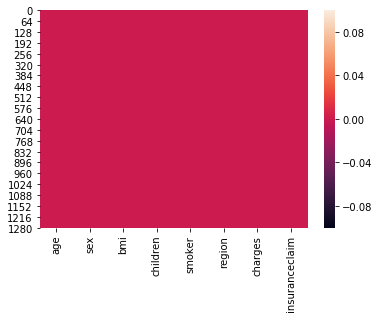

In [10]:
#checking of null values through heatmap
sns.heatmap(df.isnull())

In [11]:
#checking the correlation 
df.cor=df.corr()
df.cor

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


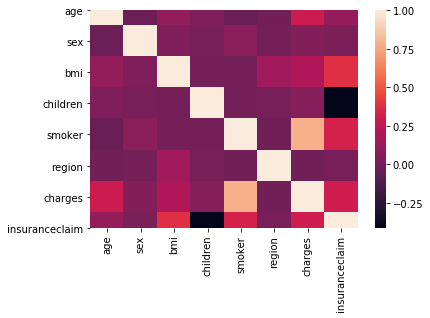

In [12]:
sns.heatmap(df.cor)

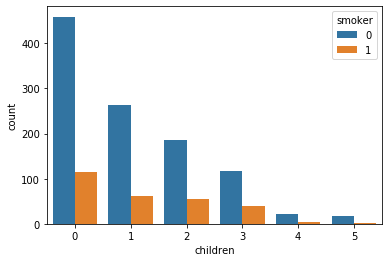

In [13]:
sns.countplot(x="children",hue="smoker",data=df)
plt.show()
#from the below graph it is understood that people with no children or 5 children are more non-smokers than the smokers 

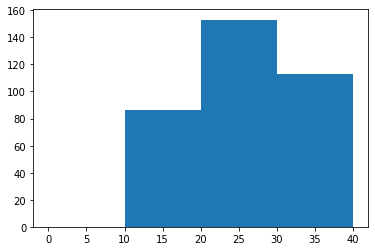

In [14]:
plt.hist(x="age",bins=range(0,50,10),data=df.loc[df["insuranceclaim"]==1])
plt.show()
#below graphs shows that maximum no. of age group lies from 22-35 who have claimed the insurance

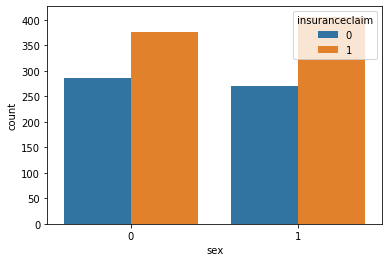

In [15]:
sns.countplot(x='sex',hue='insuranceclaim',data=df)
#below graph shows that more insurance claims are taken by the males as compared from females

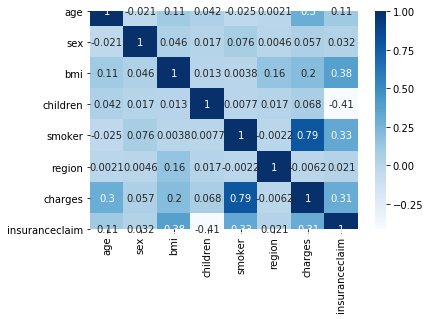

In [16]:
#correlation through heatmap with values
sns.heatmap(df.cor,cmap='Blues',annot=True)

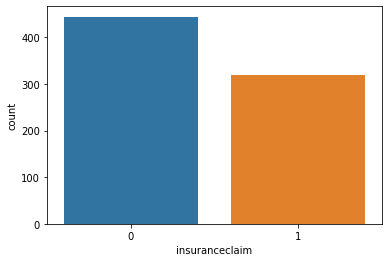

In [17]:
sns.countplot(x='insuranceclaim',data=df.loc[df["children"]!=0])

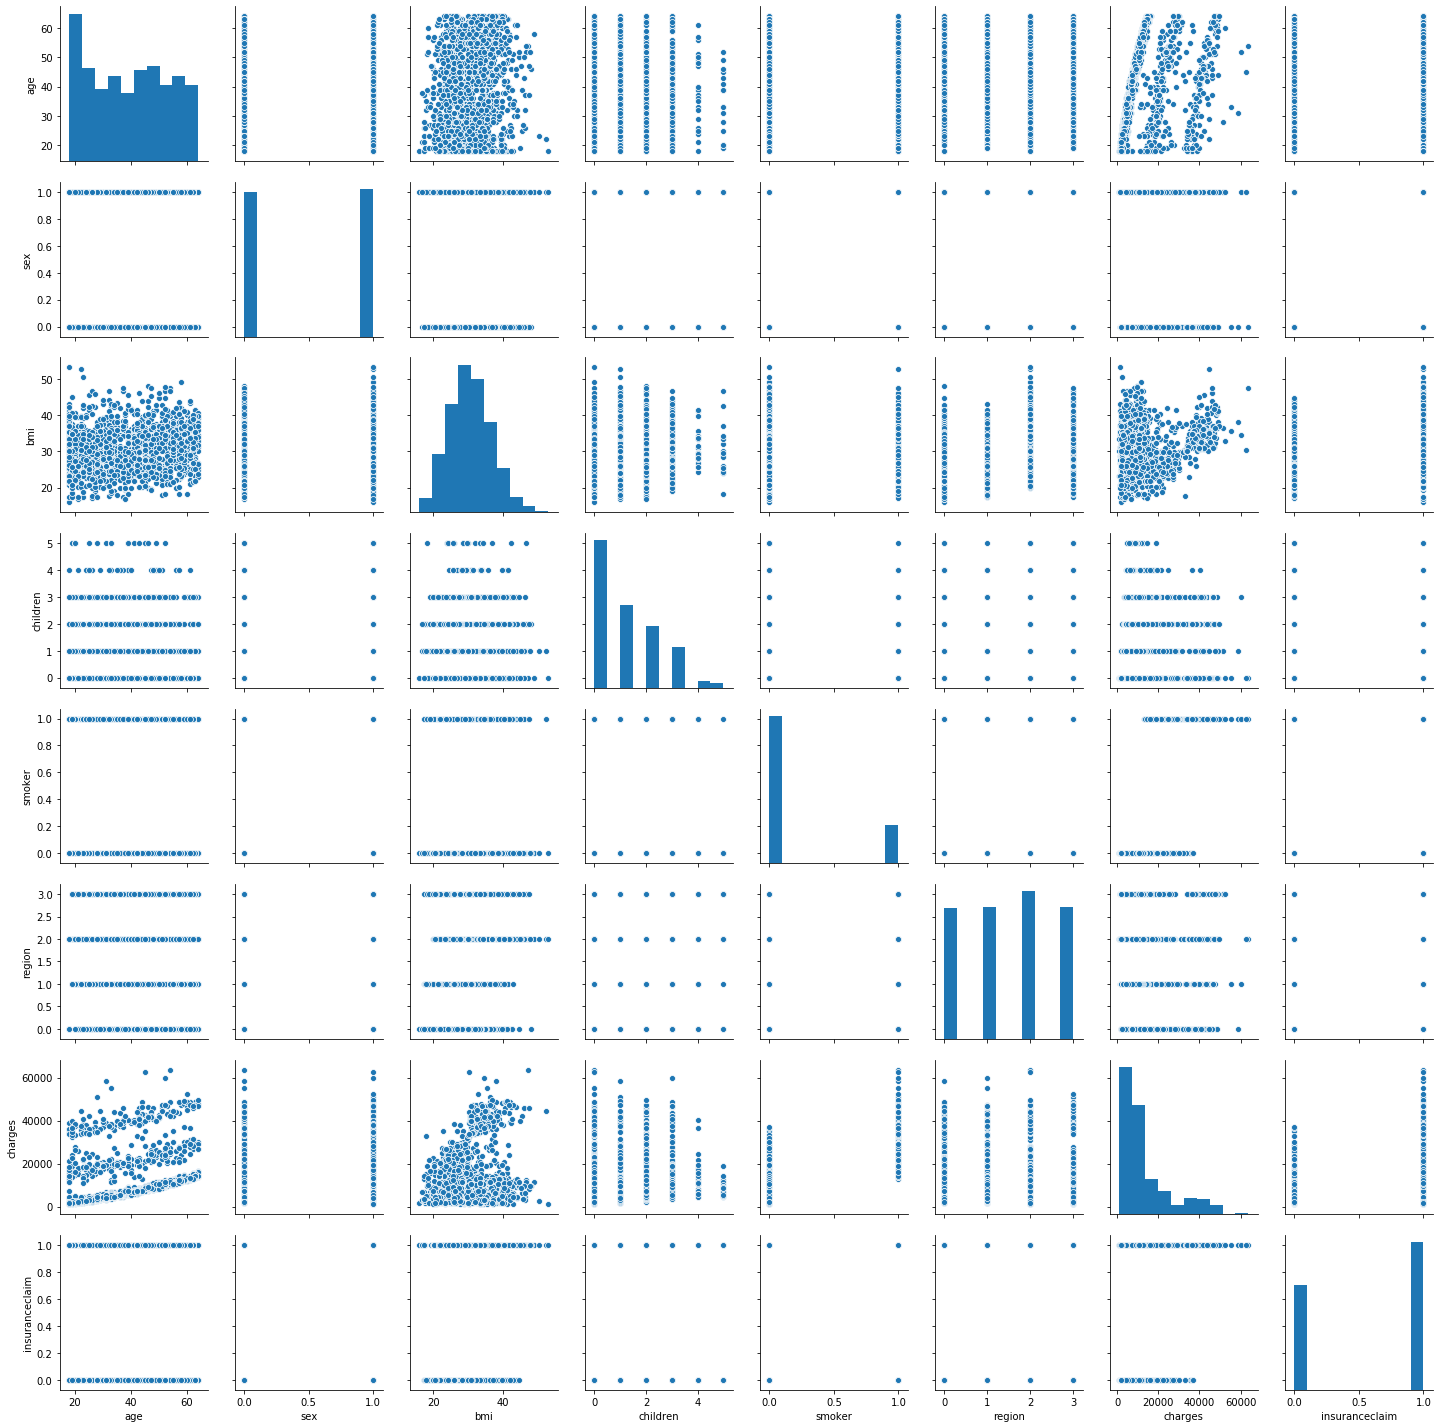

In [18]:
sns.pairplot(df)

In [24]:
#removing of outliers
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(1338, 8)
(1334, 8)


In [19]:
#checking of skewness
df.skew()

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.938380
smoker            1.464766
region           -0.038101
charges           1.515880
insuranceclaim   -0.346254
dtype: float64

In [86]:
collist=df.columns.values
ncol=8
nrows=10

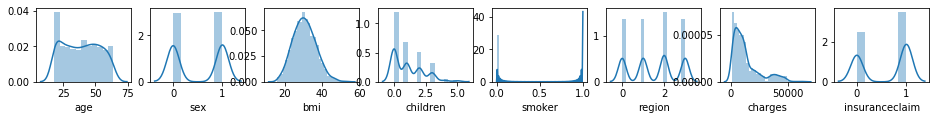

In [21]:
#checking of skewness through distplot for 10 rows
plt.figure(figsize=(16,16))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

In [84]:
#removing the skewness
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [85]:
df.skew()

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.264083
smoker            1.464766
region           -0.038101
charges          -0.089817
insuranceclaim   -0.346254
dtype: float64

In [25]:
#assigning x and y values for training and testing
x=df.drop(columns=["insuranceclaim"])
y=df[["insuranceclaim"]]

In [26]:
print(x)
print(y)

      age  sex     bmi  children    smoker  region    charges
0      19    0  27.900  0.000000  0.693147       3   9.734236
1      18    1  33.770  0.693147  0.000000       2   7.453882
2      28    1  33.000  1.386294  0.000000       2   8.400763
3      33    1  22.705  0.000000  0.000000       1   9.998137
4      32    1  28.880  0.000000  0.000000       1   8.260455
...   ...  ...     ...       ...       ...     ...        ...
1333   50    1  30.970  1.386294  0.000000       1   9.268755
1334   18    0  31.920  0.000000  0.000000       0   7.699381
1335   18    0  36.850  0.000000  0.000000       2   7.396847
1336   21    0  25.800  0.000000  0.000000       3   7.605365
1337   61    0  29.070  0.000000  0.693147       1  10.279948

[1338 rows x 7 columns]
      insuranceclaim
0                  1
1                  1
2                  0
3                  0
4                  1
...              ...
1333               0
1334               1
1335               1
1336               0


In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression

In [102]:
from sklearn.preprocessing import StandardScaler
scx=StandardScaler()
x=scx.fit_transform(x)
x

array([[-1.43876426, -1.0105187 , -0.45332   , ...,  1.97058663,
         1.34390459,  0.69138533],
       [-1.50996545,  0.98959079,  0.5096211 , ..., -0.5074631 ,
         0.43849455, -1.78986137],
       [-0.79795355,  0.98959079,  0.38330685, ..., -0.5074631 ,
         0.43849455, -0.75956237],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , ..., -0.5074631 ,
         0.43849455, -1.85192132],
       [-1.29636188, -1.0105187 , -0.79781341, ..., -0.5074631 ,
         1.34390459, -1.62503295],
       [ 1.55168573, -1.0105187 , -0.26138796, ...,  1.97058663,
        -0.46691549,  1.2851735 ]])

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [104]:
lregr=LogisticRegression()

In [105]:
def maxf1_score(regr,x,y):
    max_f1_score=0
    final_f_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        f1_scr=f1_score(y_test,y_pred)
        print("random_state is :",r_state," and f1_score is", f1_scr)
        if f1_scr>max_f1_score:
            max_f1_score=f1_scr
            final_f_state=r_state
    print("maximum f1_score to :",final_f_state," is :",max_f1_score)
    return final_f_state

In [106]:
r_state=maxf1_score(lregr,x,y)

random_state is : 42  and f1_score is 0.8863636363636365
random_state is : 43  and f1_score is 0.8757062146892656
random_state is : 44  and f1_score is 0.899135446685879
random_state is : 45  and f1_score is 0.8862275449101796
random_state is : 46  and f1_score is 0.8793103448275861
random_state is : 47  and f1_score is 0.8983050847457626
random_state is : 48  and f1_score is 0.896551724137931
random_state is : 49  and f1_score is 0.9065155807365439
random_state is : 50  and f1_score is 0.8961424332344213
random_state is : 51  and f1_score is 0.8901408450704225
random_state is : 52  and f1_score is 0.9173789173789174
random_state is : 53  and f1_score is 0.8982035928143712
random_state is : 54  and f1_score is 0.8731563421828908
random_state is : 55  and f1_score is 0.8698060941828255
random_state is : 56  and f1_score is 0.876876876876877
random_state is : 57  and f1_score is 0.893258426966292
random_state is : 58  and f1_score is 0.9002849002849002
random_state is : 59  and f1_score 

In [107]:
#doing cross validation to check whether the model is suffering from overfitting or underfitting
cross_val_score(lregr,x,y,cv=5,scoring="f1").mean()
#below score is less then the actual scsore it means the model is not suffering from over fiting or under fitting

0.8889640074337457

In [108]:
#checking more models to see if any other model is scoring more than logisitic_Regression
#checking with decision_tree_classifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [109]:
r_state=maxf1_score(dt,x,y)
#by decision tree we are getting the 100% score which means this model has learnt perfectly

random_state is : 42  and f1_score is 0.9802816901408451
random_state is : 43  and f1_score is 0.9884393063583815
random_state is : 44  and f1_score is 0.9829545454545454
random_state is : 45  and f1_score is 0.9936708860759493
random_state is : 46  and f1_score is 0.9822485207100591
random_state is : 47  and f1_score is 0.9972451790633609
random_state is : 48  and f1_score is 0.973293768545994
random_state is : 49  and f1_score is 0.9853372434017595
random_state is : 50  and f1_score is 0.9970674486803519
random_state is : 51  and f1_score is 0.9590643274853801
random_state is : 52  and f1_score is 1.0
random_state is : 53  and f1_score is 0.9854227405247813
random_state is : 54  and f1_score is 0.98125
random_state is : 55  and f1_score is 0.9853372434017595
random_state is : 56  and f1_score is 0.9384164222873901
random_state is : 57  and f1_score is 0.9715909090909091
random_state is : 58  and f1_score is 0.991404011461318
random_state is : 59  and f1_score is 0.9881656804733728
ra

In [110]:
#checking if decision_tree model is suffering from overfitting or underfitting
cross_val_score(dt,x,y,cv=5,scoring="f1").mean()
#the score is less than the actual score it means it is not suffering from overfitting or underfitting

0.97846747103205

In [111]:
#As deicision tree is showing the best results so we will save it for the production
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=52,test_size=0.22)
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [112]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error
print("f1 score is:" ,f1_score(y_test,y_pred))
print("RMSE is:" ,np.sqrt(mean_squared_error(y_test,y_pred)))
print("Confusion Matrix is:",confusion_matrix(y_test,y_pred))
print("Classification Report is:" ,classification_report(y_test,y_pred))

f1 score is: 1.0
RMSE is: 0.0
Confusion Matrix is: [[121   0]
 [  0 174]]
Classification Report is:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00       174

    accuracy                           1.00       295
   macro avg       1.00      1.00      1.00       295
weighted avg       1.00      1.00      1.00       295



In [113]:
#Saving the model
from sklearn.externals import joblib
joblib.dump(dt,'SBI_Insurance_dt.pk1')

['SBI_Insurance_dt.pk1']